In [2]:
import pandas as pd
import numpy as np
import pandapower as pp
import os

In [7]:
base_dir = './'
data_dir = os.path.join(base_dir, 'data')
results_dir = os.path.join(base_dir, 'results')

In [4]:
grid_file = os.path.join(data_dir, 'hybit_egrid_cell1.json')
#grid_file = os.path.join(data_dir, 'steelPlant_elecGrid.json')
grid_model = pp.from_json(grid_file)
pp.runpp(grid_model, numba=False)
print(f"Grid model of {len(grid_model.load)} loads,\
 {len(grid_model.sgen)} sgens,\
 {len(grid_model.bus)} buses,\
 {len(grid_model.line)} lines,\
 {len(grid_model.trafo)} trafos,\
 {len(grid_model.ext_grid)} ext_grids")

Grid model of 0 loads, 0 sgens, 189 buses, 168 lines, 20 trafos, 1 ext_grids


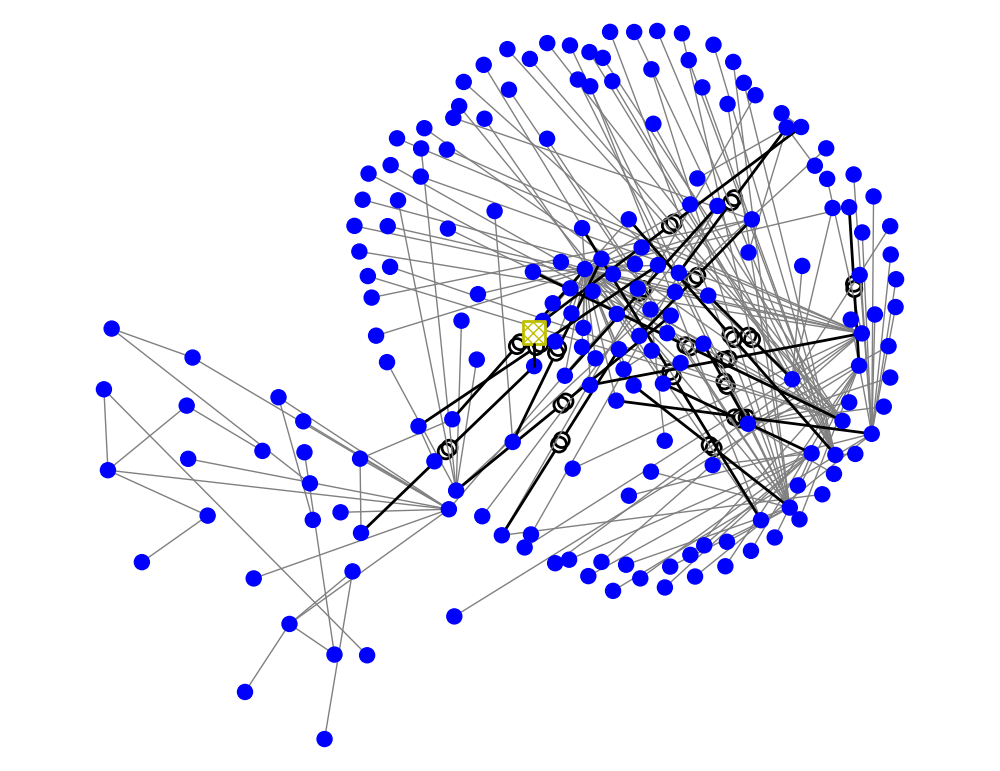

<Axes: >

In [5]:
grid_model = pp.plotting.create_generic_coordinates(grid_model, library='networkx', overwrite=True)
pp.plotting.simple_plot(grid_model)

<Axes: >

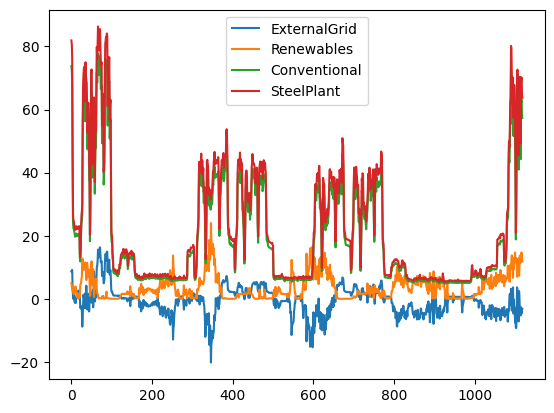

In [14]:
results = pd.read_csv(os.path.join(results_dir, 'test_results.csv'))\
            .rename(columns={'GridSim.ExternalGrid-0-P[MW]': 'ExternalGrid', 
                            'FlexSim.FLSim-0-P[MW]': 'Renewables',
                            'FlexSim.FLSim-1-P[MW]': 'Conventional',
                            'SteelPlantSim.SteelPlant_0-P[MW]': 'SteelPlant',
                            'PowerPlantSim.PowerPlant_0-P[MW]': 'PowerPlant',
                            })
#results['delta'] = results['ExternalGrid'] + results['Renewables'] - results['SteelPlant']
results[['ExternalGrid', 
         'Renewables',
         'Conventional',
         'SteelPlant']].plot()